# Metis Project 2
### Linear regression model to identify major determinants of life expectancy accross countries  


In [165]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import lars_path
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from functools import reduce

import pickle

sns.set()
%matplotlib inline

In [166]:
# list pickled data files 
import os
files = os.listdir('Data/Pickled')
files

['bmi.pkl',
 'smoking.pkl',
 'democracy.pkl',
 'health_exp.pkl',
 'gdp_cap.pkl',
 'regions.pkl',
 'age.pkl',
 'peace.pkl',
 'epi.pkl',
 'ment_prob.pkl',
 'alcohol.pkl',
 'rel_imp.pkl',
 'inf_mort.pkl',
 'road_fatalities.pkl']

In [167]:
# lets create a list of dataframes

data_list = []
for f in files:
    file = open(f'Data/Pickled/{f}', "rb")
    data = pickle.load(file)
    data_list.append(data)
    file.close()

In [168]:
# merging all the databases
# 'reduce' function allows to do it sequentially

le = reduce(lambda x, y: pd.merge(x, y, on='country', how='outer'), data_list)

In [169]:
# lets take a look at the resulting dataframe
pd.set_option('display.max_rows', 250)
le.sort_values(by='life_exp', ascending=False).head(250)

,country,obesity,smoking,democracy,health_exp_per_cap,gdp_cap,region,life_exp,peace_idx,environment,mental_h_disorders,alcohol,religion,infant_mortality,road_fatalities
168,Japan,22.6,1583.2,7.99,3733.0,40846.0,Eastern Asia,84.500,1.369,74.69,12.360916,7.2,24.0,2.5,4.1
193,Hong Kong,NaN,NaN,6.02,NaN,49334.0,Eastern Asia,84.100,NaN,NaN,NaN,NaN,24.0,NaN,NaN
146,Singapore,23.7,851.2,6.02,2280.0,63987.0,South-Eastern Asia,83.800,1.347,64.23,12.441059,2.0,70.0,2.8,3.6
93,Italy,26.0,1493.3,7.52,2700.0,32946.0,Southern Europe,83.600,1.754,76.96,14.889970,6.7,72.0,3.0,5.6
61,Spain,26.7,1499.0,8.29,2354.0,29961.0,Southern Europe,83.400,1.699,78.39,16.176642,11.2,49.0,3.0,4.1
124,Switzerland,25.3,1489.8,9.03,9818.0,83716.0,Western Europe,83.400,1.375,87.42,14.857480,10.7,41.0,4.1,2.7
42,Australia,27.2,917.0,9.09,4934.0,53825.0,Pacific Islands,83.300,1.419,74.12,18.381283,12.2,32.0,3.7,5.6
100,Iceland,25.9,848.1,9.58,4375.0,67037.0,Northern Europe,82.900,1.072,78.57,14.212628,7.1,NaN,2.0,6.6
143,South Korea,23.9,1667.4,8.00,NaN,31430.0,Eastern Asia,82.800,1.867,62.30,11.808507,12.3,43.0,3.2,9.8
78,Israel,26.3,1280.7,7.86,2756.0,42823.0,Western Asia,82.800,2.735,75.01,12.716615,2.8,51.0,3.7,4.2


In [170]:
le.shape

(300, 15)

In [171]:
le.isnull().sum()

country                 0
obesity               110
smoking               119
democracy             133
health_exp_per_cap    111
gdp_cap               107
region                 63
life_exp              104
peace_idx             137
environment           120
mental_h_disorders     69
alcohol               109
religion              151
infant_mortality      108
road_fatalities       113
dtype: int64

In [172]:
le.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 15 columns):
country               300 non-null object
obesity               190 non-null float64
smoking               181 non-null float64
democracy             167 non-null float64
health_exp_per_cap    189 non-null float64
gdp_cap               193 non-null float64
region                237 non-null object
life_exp              196 non-null float64
peace_idx             163 non-null float64
environment           180 non-null float64
mental_h_disorders    231 non-null float64
alcohol               191 non-null float64
religion              149 non-null float64
infant_mortality      192 non-null float64
road_fatalities       187 non-null float64
dtypes: float64(13), object(2)
memory usage: 37.5+ KB


In [173]:
# lets remove countries/continents/regions/subregions  that do not have a label
le = le[le.life_exp.notnull()]

In [174]:
le.isnull().sum()

country                0
obesity               13
smoking               20
democracy             33
health_exp_per_cap    17
gdp_cap               14
region                 9
life_exp               0
peace_idx             39
environment           22
mental_h_disorders    12
alcohol               16
religion              50
infant_mortality      13
road_fatalities       22
dtype: int64

In [175]:
# setting 'country' as index and remove countries that have too much missing info
le.set_index('country', inplace=True)
le = le[le.isnull().sum(axis=1) < 6]

In [176]:
le.shape

(180, 14)

In [177]:
le.describe()

,obesity,smoking,democracy,health_exp_per_cap,gdp_cap,life_exp,peace_idx,environment,mental_h_disorders,alcohol,religion,infant_mortality,road_fatalities
count,179.000000,176.000000,159.000000,175.000000,176.000000,180.000000,155.000000,173.000000,179.000000,177.000000,144.000000,178.000000,170.000000
mean,25.568156,913.502273,5.468113,1006.342857,14084.073864,72.284417,2.101839,56.455491,12.851951,6.268927,74.354167,28.746067,16.241176
std,2.220700,897.125428,2.245672,1718.563205,19542.041932,7.584110,0.512950,12.938672,1.797596,4.252031,24.397199,29.178566,8.917741
min,20.500000,9.700000,1.130000,17.000000,275.000000,52.800000,1.072000,27.430000,9.715823,0.100000,16.000000,1.700000,1.900000
25%,23.900000,296.700000,3.370000,86.500000,1915.500000,66.850000,1.788500,46.370000,11.404448,2.400000,54.750000,7.100000,7.850000
50%,25.900000,573.150000,5.650000,301.000000,5715.000000,73.500000,2.038000,56.630000,12.346421,6.600000,84.000000,16.350000,15.600000
75%,27.000000,1414.300000,7.165000,958.500000,17545.000000,77.650000,2.337000,64.710000,14.202456,9.600000,94.000000,45.550000,24.375000
max,31.900000,6398.300000,9.870000,9818.000000,113196.000000,84.500000,3.574000,87.420000,18.712421,17.600000,100.000000,121.500000,35.900000


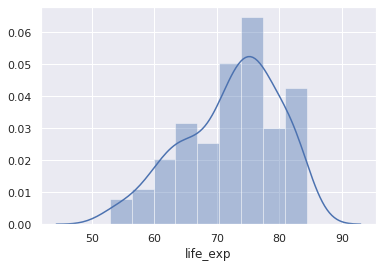

In [178]:
# distribution of the target variable - not terribly skewed
sns.distplot(le['life_exp'])

In [179]:
re = le.groupby('region')['life_exp'].mean().reset_index().sort_values(by='life_exp', ascending=False).head(20)
re.columns

Index(['region', 'life_exp'], dtype='object')

Text(0.5, 0, 'Age')

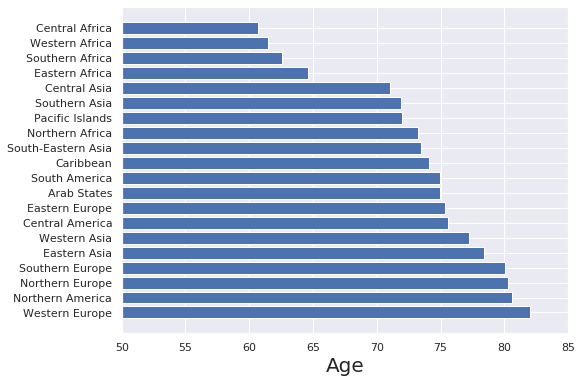

In [180]:
plt.figure(figsize=(8, 6))
plt.barh(re.region, re.life_exp, data=re)
plt.xlim(50, 85)
plt.xlabel('Age', fontsize=20)

In [181]:
le_re = le[le.region.notna()].copy()
ohe = OneHotEncoder()
X_ohe = ohe.fit_transform(le_re[['region']]).toarray()
m = LinearRegression()
m.fit(X_ohe, le_re.life_exp)
print('R2(regions)=', m.score(X_ohe, le_re.life_exp))

R2(regions)= 0.7182948050820104


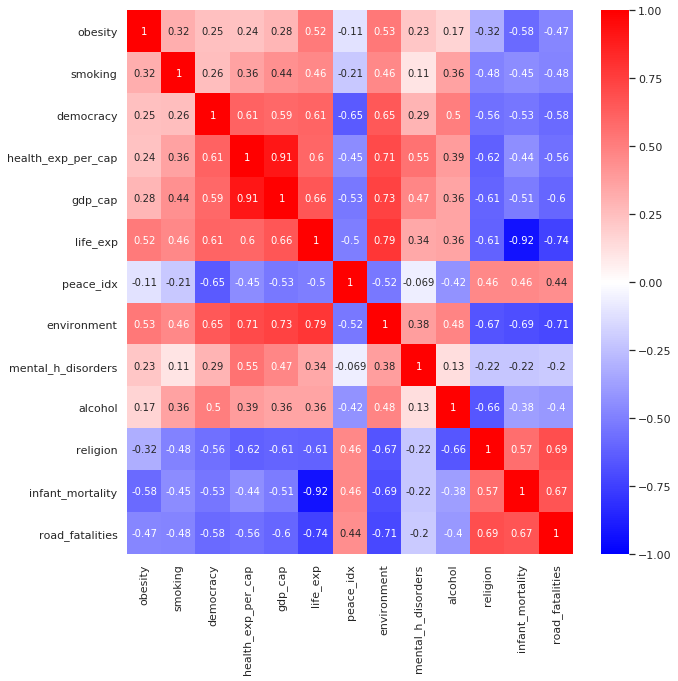

In [182]:
plt.figure(figsize=(10, 10))
sns.heatmap(le.corr(), annot=True, center=0,  vmin=-1, vmax=1, cmap='bwr')

In [183]:
# gdp variable is closely correlated with health expenditure - will drop it
le = le.drop('gdp_cap', axis=1)
le.shape

(180, 13)

In [184]:
#le = le.fillna(le.mean(axis =0))
le = le.groupby("region").transform(lambda x: x.fillna(x.mean()))

R2(Health Expenditure, No transf)= 0.3498774765556518
R2(Health Expenditure, Square Root)= 0.5476625773079059
R2(Health Expenditure, LOG)= 0.7127106500021035


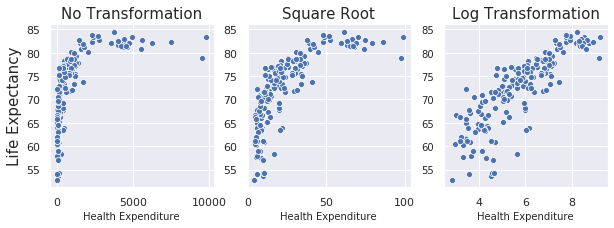

In [185]:
# transforming Health Expenditure Variable

# 1. No transformation
le1 = le.copy()
plt.figure(figsize=[10, 3])
plt.subplot(1, 3, 1)  # (number of rows, number of columns, number of plot)
plt.title('No Transformation', fontsize=15)
sns.scatterplot('health_exp_per_cap', 'life_exp', ci=None, data=le1)
plt.ylabel('Life Expectancy', fontsize=15)
plt.xlabel('Health Expenditure', fontsize=10)
m = LinearRegression()
m.fit(le1[['health_exp_per_cap']], le1['life_exp'])
print('R2(Health Expenditure, No transf)=', m.score(
    le1[['health_exp_per_cap']], le1['life_exp']))
#print(le1['health_exp_per_cap'].corr(le1['life_exp']))

#2. Square root transformation
le2 = le.copy()
plt.subplot(1, 3, 2)
le2['health_exp_per_cap_sq_root'] = (le.health_exp_per_cap**(1/2))
sns.scatterplot('health_exp_per_cap_sq_root', 'life_exp', ci=None, data=le2)
plt.ylabel('')
plt.xlabel('Health Expenditure', fontsize=10)
plt.title('Square Root', fontsize=15)
m.fit(le2[['health_exp_per_cap_sq_root']], le2['life_exp'])
print('R2(Health Expenditure, Square Root)=', m.score(
    le2[['health_exp_per_cap_sq_root']], le2['life_exp']))
#print(le2['health_exp_per_cap_sq_root'].corr(le2['life_exp']))


#3. Log transformation
le3 = le.copy()
plt.subplot(1, 3, 3)
le3['health_exp_per_cap_log'] = (np.log(le.health_exp_per_cap))
#print(le3['health_exp_per_cap_log'].corr(le3['life_exp']))
sns.scatterplot('health_exp_per_cap_log', 'life_exp', ci=None, data=le3)
plt.title('Log Transformation', fontsize=15)
plt.xlabel('Health Expenditure', fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('')

m.fit(le3[['health_exp_per_cap_log']], le3['life_exp'])
print('R2(Health Expenditure, LOG)=', m.score(
    le3[['health_exp_per_cap_log']], le3['life_exp']))

In [186]:
le['health_exp_per_cap'] = np.log(le.health_exp_per_cap)
Q1 = le.quantile(0.25)
Q3 = le.quantile(0.75)
IQR = Q3 - Q1
le = le[~((le > (Q3 + 2 * IQR))).any(axis=1)]
le.shape

(175, 12)

In [187]:
# Separate features from our target

X = le.drop(['life_exp'], axis=1)
y = le['life_exp']

# perform train/val split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42)

col = X_train.columns

Text(0.5, 1.0, 'Linear Regression - Residual Errors')

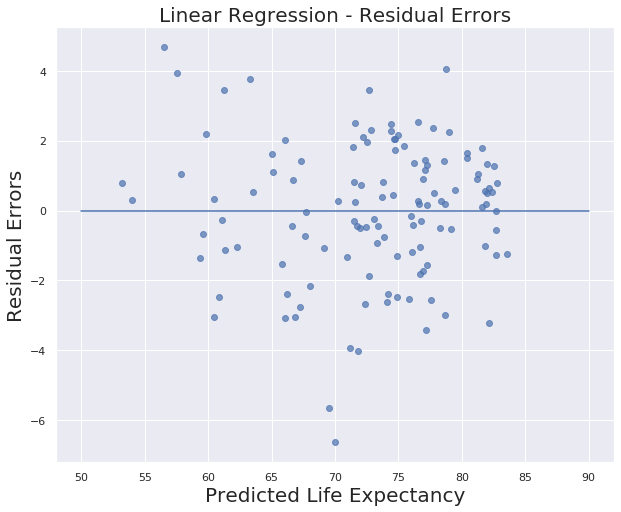

In [188]:
#   linear regression - checking assumptions

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict((X_train))
plt.figure(figsize=(10, 8))
plt.scatter(y_pred, y_train-y_pred, alpha=0.7)
plt.plot(np.linspace(50, 90, 1000), np.linspace(0, 0, 1000))
plt.xlabel('Predicted Life Expectancy', fontsize=20)
plt.ylabel('Residual Errors', fontsize=20)
plt.title('Linear Regression - Residual Errors', fontsize=20)

In [189]:
# linear regression cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
lm = LinearRegression()
cross_val_score(lm, X_train, y_train, cv=kf, scoring='r2')

print(' Linear Regression:','\n','R2 Cross Val Score =' , np.mean(cross_val_score(lm, X_train, y_train, cv=kf, scoring='r2')))

 Linear Regression: 
 R2 Cross Val Score = 0.8784985666871078


In [190]:
# linear regression - polynomial features
p = PolynomialFeatures(degree=2)
X_train_poly = p.fit_transform(X_train)
X_test_poly = p.fit_transform(X_val)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
lm = LinearRegression()
print(' Polynomial Features:','\n', 'R2 Cross Val Score=', np.mean(cross_val_score(lm, X_train_poly, y_train, cv=kf, scoring='r2')))

# lm.fit(X_train_poly, y_train)
# print(lm.score(X_test_poly, y_val))

 Polynomial Features: 
 R2 Cross Val Score= 0.34601330753197107


In [191]:
# scaling independent features

scaler = StandardScaler()
X_tr = scaler.fit_transform(X_train)
X_v = scaler.fit_transform(X_val)

In [192]:
# Ridge regression Grid Search
kf = KFold(n_splits=10, shuffle=True, random_state=42)
pipe = Pipeline([("scale", StandardScaler()),
                 ("ridge", Ridge())
                 ])

param = dict(ridge__alpha=np.array(10**np.linspace(-2, 2, 200)))
grid = GridSearchCV(pipe, param_grid=param, cv=kf, scoring='r2')
g = grid.fit(X_train, y_train)

print(' Ridge Regression:', '\n', 'R2 Cross Val Score=' ,g.best_score_)
print(g.best_params_)



 Ridge Regression: 
 R2 Cross Val Score= 0.8788747154652548
{'ridge__alpha': 1.4820207057988586}


In [193]:
# Lasso parameters grid search
# Obtaining CV score that is higher that that of Linear Regression or Ridge regression
kf = KFold(n_splits=5, shuffle=True, random_state=42)
pipe = Pipeline([("scale", StandardScaler()),
                 ("lasso", Lasso())
                 ])

param = dict(lasso__alpha=10**np.linspace(-2, 0, 200))
grid = GridSearchCV(pipe, param_grid=param, cv=kf, scoring='r2')
g = grid.fit(X_train, y_train)

print(' Lasso Regression:', '\n', 'R2 Cross Val Score=', g.best_score_)
print(g.best_params_)

 Lasso Regression: 
 R2 Cross Val Score= 0.8852941293787838
{'lasso__alpha': 0.0698587974678525}


In [194]:
# predicting with optimal alpha
clf = Lasso(alpha=0.07)
a = clf.fit(X_tr, y_train)
print(' R2 Test Score:', r2_score(y_val, a.predict(X_v)))
print('Coefficients:')
for feature, coef in zip(X.columns, a.coef_):
    print(feature, ':', f'{coef:.2f}')

 R2 Test Score: 0.85400787159986
Coefficients:
obesity : -0.65
smoking : 0.09
democracy : 0.29
health_exp_per_cap : 1.98
peace_idx : -0.00
environment : 0.58
mental_h_disorders : 0.59
alcohol : -0.75
religion : 0.41
infant_mortality : -4.90
road_fatalities : -0.65


In [195]:
# reducing number of independent variables to obtain better interpretability

clf = Lasso(alpha=0.45)
a = clf.fit(X_tr, y_train)
print(' R2 Test Score:', r2_score(y_val, a.predict(X_v)))
print('Coefficients:')
for feature, coef in zip(X.columns, a.coef_):
    print(feature, ':', f'{coef:.2f}')

 R2 Test Score: 0.8410152026887676
Coefficients:
obesity : -0.00
smoking : 0.00
democracy : 0.00
health_exp_per_cap : 1.78
peace_idx : -0.00
environment : 0.19
mental_h_disorders : 0.35
alcohol : -0.00
religion : 0.00
infant_mortality : -4.53
road_fatalities : -0.34


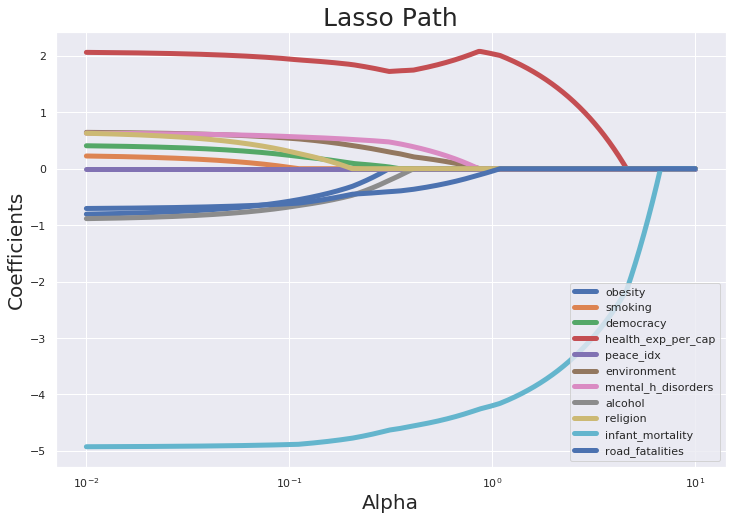

In [196]:
# visualizing Lasso path

n_alphas = 1000
alphas = np.logspace(-2, 1, n_alphas)
coefs = []
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_tr, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs, linewidth=5)
ax.figure.set_size_inches(12, 8)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::])  # reverse axis
plt.xlabel('Alpha', fontsize=20)
plt.ylabel('Coefficients', fontsize=20)
plt.title('Lasso Path', fontsize=25)
plt.axis('tight')
plt.legend(col, loc='lower right')
plt.show()

0.885774982588593
{'alpha': 0.07401959996915644}


Text(0.5, 1.0, ' R-squared in Lasso Model')

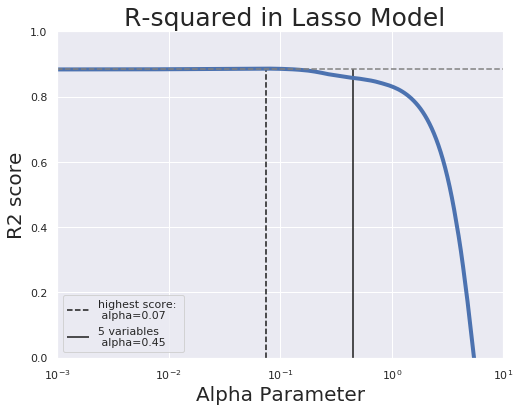

In [197]:
# visulizing R-squared as function of Alpha
lasso = Lasso()
alphas = np.logspace(-3, 1, 200)
tuned_parameters = [{'alpha': alphas}]
kf = KFold(n_splits=5, shuffle=True, random_state=42)
clf = GridSearchCV(lasso, tuned_parameters, cv=kf, refit=False)
clf.fit(X_tr, y_train)
scores = clf.cv_results_['mean_test_score']
print(clf.best_score_)
print(clf.best_params_)
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores, linewidth=4)
plt.ylabel('R2 score', fontsize=20)
plt.xlabel('Alpha Parameter', fontsize=20)
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.vlines(clf.best_params_['alpha'], 0, clf.best_score_, linestyle='dashed',
           label='highest score: \n alpha={:.2f}'.format(clf.best_params_['alpha']))
plt.vlines(0.45, 0, clf.best_score_, linestyle='solid',
           label='5 variables \n alpha={:.2f}'.format(0.45))
plt.xlim([alphas[0], alphas[-1]])
plt.ylim(0, 1)
plt.legend(loc='lower left')
plt.title(' R-squared in Lasso Model', fontsize=25)

In [198]:
# even though it was a linear regression project, I decided to compare Random Forest feature importance 
# results with Lasso feature selection results
rf = RandomForestRegressor(n_estimators=1000, max_features=10)
rf.fit(X_train, y_train)
rf.score(X_val, y_val)

0.8912567798177943

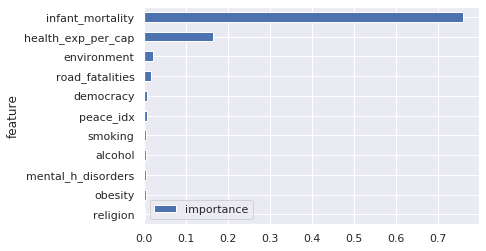

In [199]:
# changed X_train.columns to columns
rf.fit(X_train, y_train)
feat_imps = list(zip(col, rf.feature_importances_))
feat_imps = sorted(feat_imps, key=lambda x: x[1], reverse=False)
feat_imps = pd.DataFrame(feat_imps, columns=['feature', 'importance'])

feat_imps.plot(x='feature', y='importance', kind='barh')